<a href="https://colab.research.google.com/github/rancel-rana/-rancel-rana-DWP-and-Tech-lab-Practicals/blob/main/DWP_Pract_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

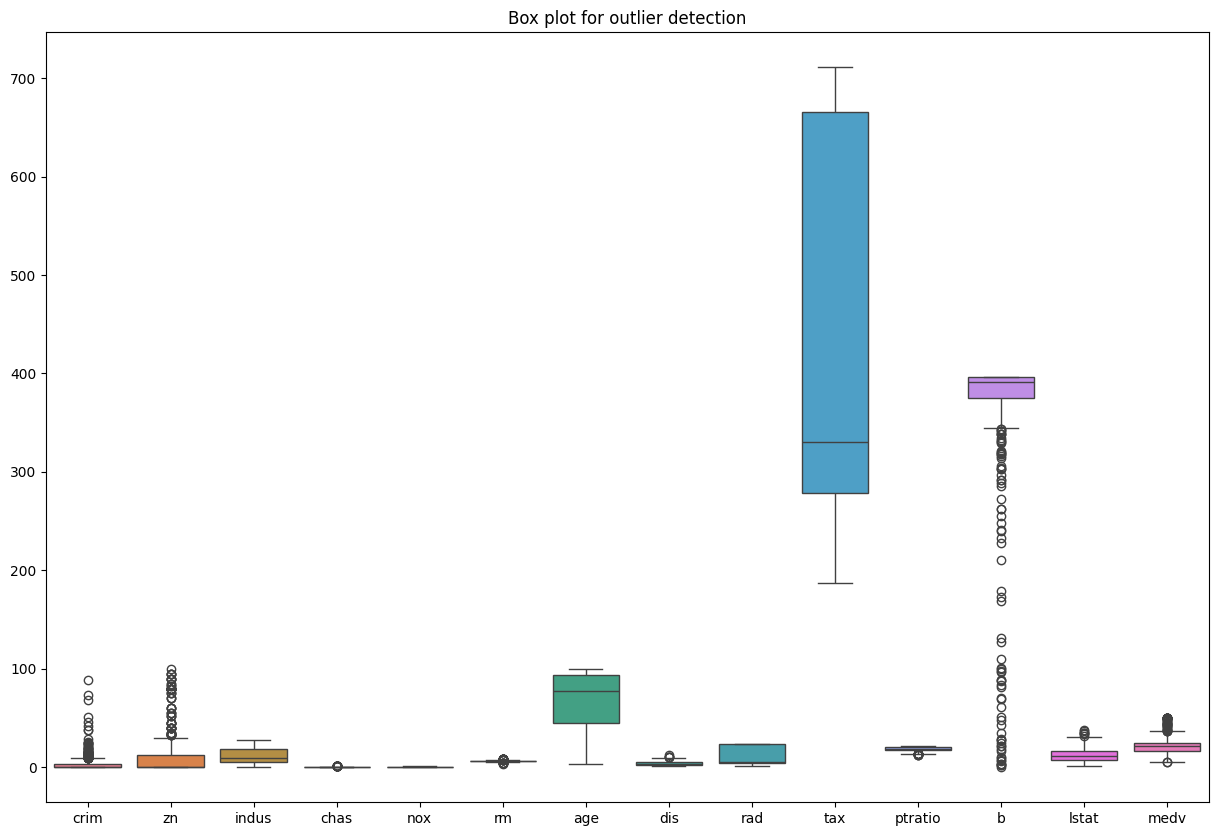

In [1]:
# Outlier Detection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv')
plt.figure(figsize=(15,10))
plt.title('Box plot for outlier detection')
sns.boxplot(data=df)
plt.show()

In [2]:
def detect_outlier_iqr(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = ((df < lower_bound) | (df > upper_bound)).sum()
  return outliers

outlier_count = df.apply(detect_outlier_iqr)
print(outlier_count)

crim       66
zn         68
indus       0
chas       35
nox         0
rm         30
age         0
dis         5
rad         0
tax         0
ptratio    15
b          77
lstat       7
medv       40
dtype: int64


In [3]:
def detect_outlier_iqr(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = ((df < lower_bound) | (df > upper_bound))
  print(outliers)
  return outliers

outlier_count = df.apply(detect_outlier_iqr)
print(outlier_count)

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: crim, Length: 506, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: zn, Length: 506, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: indus, Length: 506, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: chas, Length: 506, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: nox, Length: 506, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    Fals

In [4]:
def detect_outlier_iqr(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return ((df < lower_bound) | (df > upper_bound))
  outliers = ((df < lower_bound) | (df > upper_bound))
  print(outliers)
  return outliers

outlier_mask = df.apply(detect_outlier_iqr)
print(outlier_mask)

      crim     zn  indus   chas    nox     rm    age    dis    rad    tax  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     ptratio      b  lstat   medv  
0      False  False  False  False  
1  

In [5]:
for col in df.columns:
  median_value = df[col].median()
  df.loc[outlier_mask[col], col] = median_value
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
# find where the outliers were replaced
outlier_indices = np.where(outlier_mask)
outlier_location = list(zip(df.columns[outlier_indices[1]], outlier_indices[0]))

print("\n Location of outliers replaced (column,row index):")
for col, row in outlier_location:
  print(f"{col}:{row}")


 Location of outliers replaced (column,row index):
b:18
b:25
b:27
b:32
b:34
zn:39
zn:40
zn:54
zn:55
zn:56
zn:57
zn:65
zn:66
rm:97
medv:97
rm:98
medv:98
b:102
b:118
b:134
lstat:141
chas:142
b:145
b:146
b:151
chas:152
b:152
b:153
chas:154
b:154
chas:155
b:155
b:156
medv:157
chas:160
b:160
medv:161
chas:162
rm:162
medv:162
chas:163
rm:163
medv:163
b:165
rm:166
medv:166
b:167
b:168
b:169
b:170
medv:179
rm:180
medv:180
medv:182
rm:186
medv:186
zn:187
zn:188
zn:189
zn:190
medv:190
zn:191
zn:192
zn:193
zn:194
zn:195
rm:195
medv:195
zn:196
ptratio:196
zn:197
ptratio:197
zn:198
ptratio:198
zn:199
zn:200
zn:201
zn:202
medv:202
zn:203
rm:203
medv:203
zn:204
rm:204
medv:204
chas:208
chas:209
chas:210
chas:211
chas:212
chas:216
chas:218
chas:219
chas:220
chas:221
chas:222
rm:224
medv:224
rm:225
medv:225
rm:226
medv:226
medv:228
rm:232
medv:232
rm:233
medv:233
chas:234
chas:236
rm:253
medv:253
zn:254
zn:255
zn:256
medv:256
rm:257
ptratio:257
medv:257
ptratio:258
ptratio:259
ptratio:260
ptratio:261


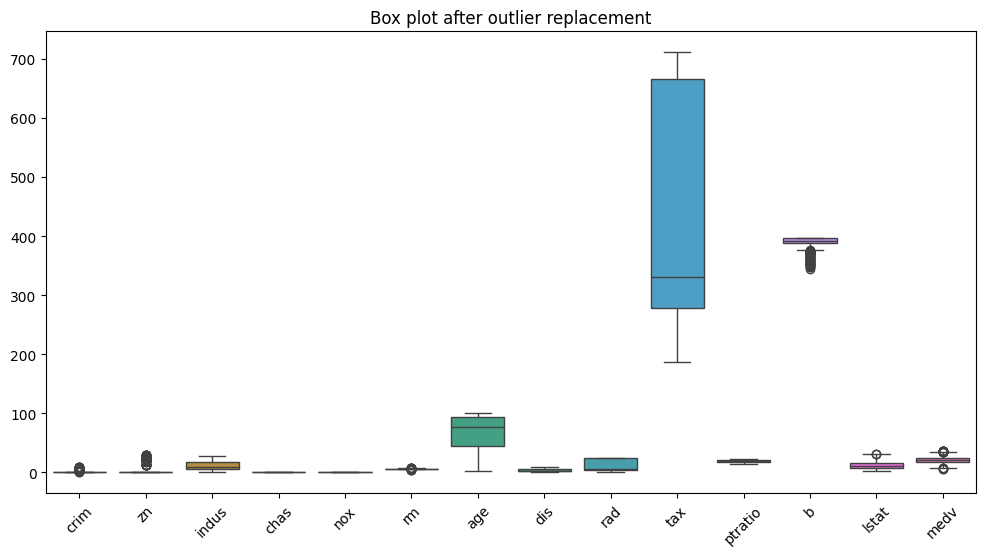

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Box plot after outlier replacement')
plt.show()